# ATIVIDADE PRÁTICA 2 - IF69P - Processamento de Imagens - C81
## Vinicius Augusto de Souza - 1997530

-------------------------------------------------------------------------------------------------------------------------------

##  ---*--- Especificação do Problema ---*---

## Escreva um programa para aplicar as seguintes operações:

#### Observação: Para todas as operações de filtragem o usuário pode estipular o tamanho da máscara desejada (e.g. 3X3, 5x5, etc)

#### Imports

In [1]:
import cv2
import numpy as np
from numpy import dot, exp, mgrid, pi, ravel, square, uint8, zeros
from itertools import product
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Image, display, Math, Latex

### a) Realizar a equalização do histograma;

In [5]:
f = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)

In [6]:
#Histograma
M,N = f.shape
x, y, i = 0,0,0
Lmax = 256
H = [0] * Lmax

for x in range(M-1):
    for y in range(N-1):
        H[f[x][y]] = H[f[x][y]]+1

In [7]:
# Probabilidade Pf com que cada nível de cinza K aparece na imagem f
Pf = [0] * Lmax
Sum_H = sum(H)

for i in range(Lmax):
    Pf[i] = H[i]/Sum_H

In [8]:
# Calculando a distribuição acumulada de probabilidade
aux = 0
G = [0] * Lmax
for i in range(Lmax):
    aux = aux + Pf[i]
    G[i] = aux

In [9]:
#Substituição de G pelo nivel de cinza mais próximo
G_Lmax = [0] * Lmax
for i in range(Lmax):
    G_Lmax[i] = G[i] * (Lmax-1)

G_round = [0] * Lmax
for i in range(Lmax):
    G_round[i] = round(G_Lmax[i])

In [10]:
# Nfk = H
N_Gk = [0] * Lmax
for i in range(Lmax):
    if(i == G_round[i]):
        N_Gk[i] = H[i]
    else:
        N_Gk[G_round[i]] = H[i]

In [11]:
# applying transfered values for each pixels
f_final = np.zeros_like(f)

for i in range(0,M-1):
    for j in range(0,N-1):
        f_final[i][j] = G_round[f[i][j]]

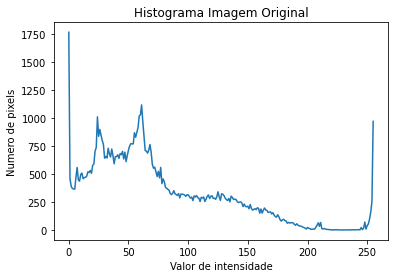

In [12]:
# Plot histograma imagem original
plt.plot(H)
plt.xlabel('Valor de intensidade')
plt.ylabel('Numero de pixels')
plt.title('Histograma Imagem Original')
plt.show()

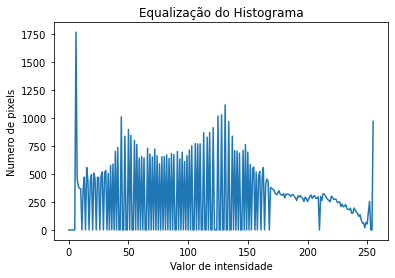

In [13]:
# Plot histograma imagem equalizada
plt.plot(N_Gk)
plt.xlabel('Valor de intensidade')
plt.ylabel('Numero de pixels')
plt.title('Equalização do Histograma')
plt.show()

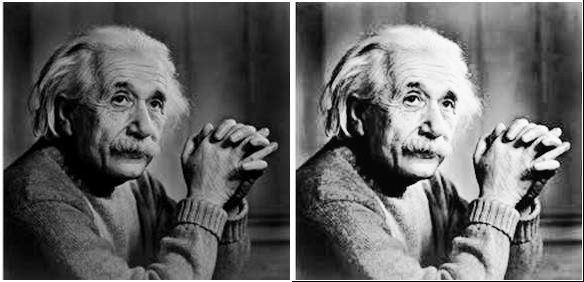

In [15]:
# Comparação entre a imagem original e a equalizada
comparison_HE = np.hstack((f,f_final))
cv2.imwrite("comparison_HE.jpg",comparison_HE)
Image(filename='comparison_HE.jpg') 

--------------------------------------------------------------------------------------------------------------------------------

### b) Aplicar filtro da média;

In [32]:
f = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
rows, columns = f.shape

In [36]:
def FiltroMedia(img, size):
    output = np.zeros((rows, columns), dtype=np.uint8)
    for i in range(0, rows):
        for j in range(0, columns):
            # janela
            window = img[i:i+size, j:j+size]
            # convertendo a matriz em array
            array1 = window.flatten()
            meanv = np.mean(array1)
            output[i][j] = meanv
    return output

f_mean = FiltroMedia(f, 3)

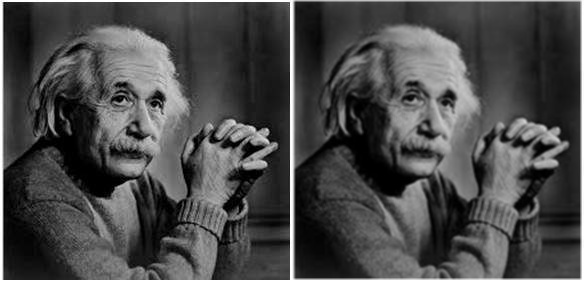

In [38]:
comparison_MEAN = np.hstack((f,f_mean))
cv2.imwrite("comparison_MEAN.jpg",comparison_MEAN)
Image(filename='comparison_MEAN.jpg')

--------------------------------------------------------------------------------------------------------------------------------

### c) Aplicar filtro da mediana;

In [43]:
f = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
rows, columns = f.shape

In [44]:
def FiltroMediana(img, size):
    output = np.zeros((rows, columns), dtype=np.uint8)
    for i in range(0, rows):
        for j in range(0, columns):
            # janela
            window = img[i:i+size, j:j+size]
            # convertendo a matriz em array
            array1 = window.flatten()
            medianv = np.lib.median(array1)
            output[i][j] = medianv
    return output

In [51]:
f_median = FiltroMediana(f, 3)

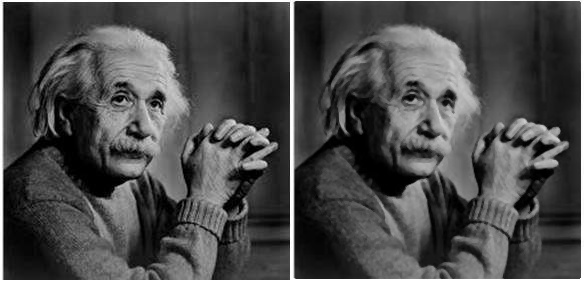

In [52]:
comparison_MEDIAN = np.hstack((f,f_median))
cv2.imwrite("comparison_MEDIAN.jpg",comparison_MEDIAN)
Image(filename='comparison_MEDIAN.jpg')

--------------------------------------------------------------------------------------------------------------------------------

### d) Aplicar filtro gaussiano;

In [2]:
def Mascara_Gaussiana(m_size, sigma):
    center = m_size // 2
    x, y = mgrid[0 - center : m_size - center, 0 - center : m_size - center]
    g = 1 / (2 * pi * sigma) * exp(-(square(x) + square(y)) / (2 * square(sigma)))
    return g

In [7]:
def FiltroGaussiano(image, m_size, sigma):
    height, width = image.shape[0], image.shape[1]
    # altura e largura da imagem dst
    dst_height = height - m_size + 1
    dst_width = width - m_size + 1

    # im2col, transforma os pixels m_size * m_size em uma linha e aplica o np.vstack em todas as linhas
    image_array = zeros((dst_height * dst_width, m_size * m_size))
    row = 0
    for i, j in product(range(dst_height), range(dst_width)):
        window = ravel(image[i : i + m_size, j : j + m_size])
        image_array[row, :] = window
        row += 1

    # transforma a mascara no shape(k*k, 1)
    mascara = Mascara_Gaussiana(m_size, sigma)
    filter_array = ravel(mascara)

    # remodelar e obter a imagem dst
    dst = dot(image_array, filter_array).reshape(dst_height, dst_width).astype(uint8)

    return dst

In [8]:
img = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
gaussian3x3 = FiltroGaussiano(img, 3, sigma=1)

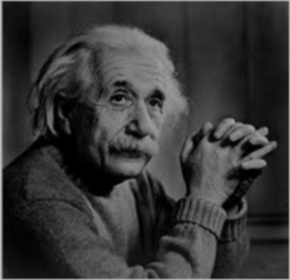

In [9]:
cv2.imwrite("gaussian3x3.jpg",gaussian3x3)
Image(filename='gaussian3x3.jpg') 